# Introduction

In this experiment we will use a dataset that is generated with a common standard sampling rate $f_s$. The goal is to see if and which architectures of neural networks are able to learn bandlimited signals.

In [2]:
import importlib
import matplotlib.pyplot as plt
import numpy as np

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
from samprecon.generators.bandlimited import BandlimitedSimple

In [4]:
# Constants 
amount_of_signals = int(1e2+1)
length_of_signals  =  int(1e2+1)

In [5]:
gen = BandlimitedSimple(length_of_signals=length_of_signals)
spectra,signals = gen.generate_signals(amount_of_signals)

Selecting at indices [84 26]


<ipython-input-6-19f92f555e27>:13: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  axs[i,0].stem(np.linspace(-0.5,0.5,length_of_signals+1),sspectra)
/home/ottersome/.local/lib/python3.9/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/ottersome/.local/lib/python3.9/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/ottersome/.local/lib/python3.9/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, 

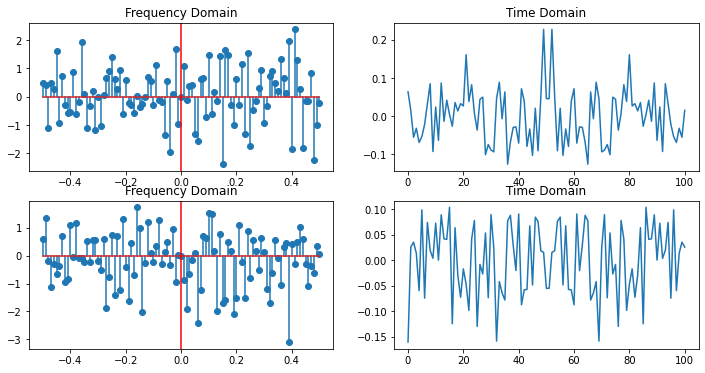

In [6]:
# Plot 
# Three at random
samples = 2
B = int(length_of_signals//2)
vals = np.random.randint(0,amount_of_signals,samples)
print('Selecting at indices ' + str(vals))

fig, axs = plt.subplots(samples,2,figsize=(samples*2*3,3*samples))
for i in range(samples):
    idx = int(vals[i])
    sspectra = np.concatenate((spectra[idx, 1:B+1],[spectra[idx,0]],spectra[idx,B+1:]))
    axs[i,0].set_title('Frequency Domain')
    axs[i,0].stem(np.linspace(-0.5,0.5,length_of_signals+1),sspectra)
    axs[i,0].axvline(x=0,color='r')
    axs[i,1].set_title('Time Domain')
    axs[i,1].plot(np.linspace(0,length_of_signals,length_of_signals+1),signals[vals[i],:])
plt.show()

# Normal Upsampling

